# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

In [24]:
input_df = pd.read_csv('/home/song/Public/Song/Work/Thesis/data/water.csv',index_col=['date_time'],parse_dates=['date_time'])

In [25]:
# Select stations

filepath = ("../hii-telemetering-batch-data-master/")
water_st = pd.read_csv(filepath+"station_metadata-water-level.csv")
water_st = water_st.loc[(water_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
col = [i for i in water_st['code']]
#เช็คว่า ชื่อสถานีมีอยู่ในDBจริงก่อนใช้
col = intersection(col,df.columns)

In [26]:
df = input_df[col].resample('d').mean()
df.head()

,NAN010,PIN003,BKK001,KWN001,NAN001,NAN002,THA001,TBW014,TB0006,PIN001,...,THA002,VLGE12,HDA004,NAN012,PIN004,CPY017,LBI002,NAN008,BKK018,CPY003
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df = df["2013-01-01":"2015-01-01"].interpolate(method='pad', limit=10) # selected period, interporlation missing value
#df.dropna(axis=1,inplace=True) # drop na stations 
print(df.shape)
df.head()


(731, 72)


,NAN010,PIN003,BKK001,KWN001,NAN001,NAN002,THA001,TBW014,TB0006,PIN001,...,THA002,VLGE12,HDA004,NAN012,PIN004,CPY017,LBI002,NAN008,BKK018,CPY003
date_time,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,82.560078,-0.046294,NaN,218.810139,NaN,15.046528,NaN,NaN,119.359161,...,11.973287,33.686783,NaN,NaN,40.765833,NaN,1.517972,19.981399,NaN,15.252431
2013-01-02,NaN,82.817308,-0.035208,NaN,218.798101,NaN,15.028889,NaN,NaN,119.383333,...,11.979371,33.538531,NaN,NaN,40.826023,NaN,1.497083,20.007532,NaN,15.230417
2013-01-03,NaN,82.702657,-0.047778,NaN,218.787569,NaN,14.972569,NaN,NaN,119.499650,...,11.964266,33.499510,NaN,NaN,40.822639,NaN,1.544583,20.144236,NaN,15.174931
2013-01-04,NaN,82.836084,-0.082361,NaN,218.782778,NaN,14.956528,NaN,NaN,119.406434,...,12.021119,33.500839,NaN,NaN,40.872361,NaN,1.549722,20.090625,NaN,15.162639
2013-01-05,NaN,82.791818,-0.091597,NaN,218.777222,NaN,14.932222,NaN,NaN,119.403287,...,12.210629,33.471888,NaN,NaN,40.996559,NaN,1.349790,20.078681,NaN,15.141597


# LSTM

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler

In [28]:
timelag = 7
y = df['CPY010'].shift(-timelag)

In [29]:
print("********RAIN_BEFORE********")
print("Min: ", np.min(df))
print("Max: ", np.max(df))
print("********RAIN_AFTER********")
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df)
print("Min: ", np.min(scaler_df))
print("Max: ", np.max(scaler_df))

********RAIN_BEFORE********
Min:  NAN010    154.275944
PIN003     81.862727
BKK001     -0.379306
KWN001    195.340629
NAN001    218.288958
             ...    
CPY017     -0.009923
LBI002      0.462246
NAN008     17.938239
BKK018      0.371111
CPY003     13.379306
Length: 72, dtype: float64
Max:  NAN010    158.775068
PIN003     82.977622
BKK001      1.174236
KWN001    201.782867
NAN001    223.367917
             ...    
CPY017      3.077273
LBI002      5.111250
NAN008     26.466528
BKK018      2.219790
CPY003     16.245069
Length: 72, dtype: float64
********RAIN_AFTER********
Min:  nan
Max:  nan


/home/song/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/song/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [30]:
X = df.values[:-timelag]
print(type(X))
print("Shape:",X.shape)
print("*"*20)

y = y.values[:-timelag]
y = y.reshape(-1,1)
print(type(y))
print("Shape:", y.shape)

<class 'numpy.ndarray'>
Shape: (724, 72)
********************
<class 'numpy.ndarray'>
Shape: (724, 1)


In [31]:
num_data = len(X)
train_split = 0.8 #8:2 train:test

num_train = int(train_split*num_data)
num_test = num_data-num_train

print("Total data From..",num_data)
print("Train:",num_train,", Test:",num_test)

######################################
x_train = X[0:num_train]
x_test = X[num_train:]

y_train = y[0:num_train]
y_test = y[num_train:]

num_x_feature = X.shape[1]
num_y_feature = y.shape[1]
######################################
print('='*30)
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x feature....",num_x_feature)
print("y feature....",num_y_feature)

Total data From.. 724
Train: 579 , Test: 145
x_train shape (579, 72)
y_train shape (579, 1)
x feature.... 72
y feature.... 1


In [32]:
def batch_gen(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_feature)
        x_batch = np.zeros(shape = x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_feature)
        y_batch = np.zeros(shape = y_shape, dtype=np.float16)
        
        #fill batch with random sequences of data
        for i in range(batch_size):
            
            #Get rand start index,
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequence of data start at this index.
            x_batch[i] = x_train[idx:idx+sequence_length]
            y_batch[i] = y_train[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)       

In [33]:
batch_size = 256
sequence_length = timelag

generator = batch_gen(batch_size=batch_size,
                            sequence_length=sequence_length)

x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

(256, 7, 72)
(256, 7, 1)


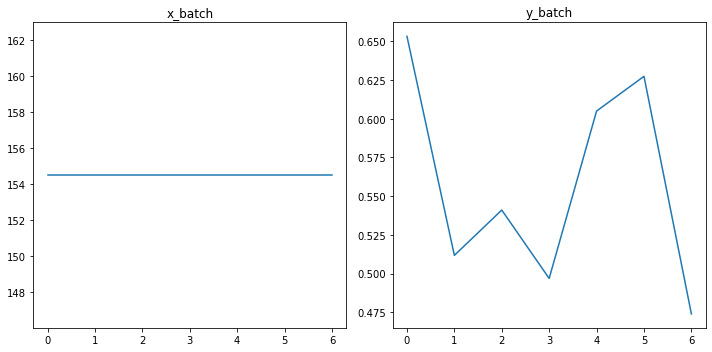

In [34]:
batch = 10  # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
seq2 = y_batch[batch, :, signal]


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(seq)
ax[0].set_title("x_batch")
ax[1].plot(seq2)
ax[1].set_title("y_batch")
fig.tight_layout() 


In [35]:
validation_data = (np.expand_dims(x_test, axis=0),np.expand_dims(y_test, axis=0))

print("x_test shape:",validation_data[0].shape)
print("y_test shape:",validation_data[1].shape)

x_test shape: (1, 145, 72)
y_test shape: (1, 145, 1)


In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None,num_x_feature),
              activation='relu'))
model.add(LSTM(128,return_sequences=True))
model.add(Dense(num_y_feature,activation='relu'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 128)         102912    
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           129       
Total params: 234,625
Trainable params: 234,625
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x=generator,
          epochs=100,
          steps_per_epoch=100,validation_data=validation_data)

Epoch 1/100
100/100 [==============================] - 7s 74ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 6s 61ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 8s 75ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 6s 58ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 4s 44ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 4s 44ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 6s 59ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val

Epoch 57/100
100/100 [==============================] - 5s 47ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 58/100
100/100 [==============================] - 4s 36ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
100/100 [==============================] - 5s 49ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
100/100 [==============================] - 8s 79ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
100/100 [==============================] - 5s 49ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 62/100
100/100 [==============================] - 4s 45ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 63/100
100/100 [==============================] - 4s 37ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: na

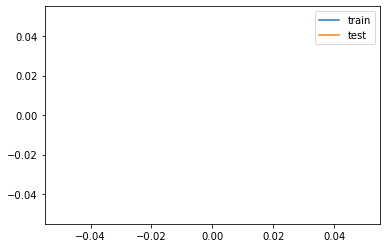

In [38]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()